# Example of loading a FITS image with PEDRA and performing basic operations

In this notebook, we will:
  - Open a fits image from a telescope
  - Check some image properties and header
  - View the image
  - trim, rebin and normalize

In [1]:
import pedra

/home/mario/local/anaconda3/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


## Loading a fits image

The FITS structure mus be specified as follows:

In [2]:
pedra.loadimage?

Signature:
pedra.loadimage(
    imgfile,
    data_ext=0,
    header_ext=0,
    wcs_ext=None,
    err_ext=None,
    mask=None,
    label=None,
    **kwargs,
)
Docstring:
Load Image from file. 

Parameters
----------
imgfile: string
    Image file path.

data_ext: int 
    Fits file extention for image data. 
    Default is 0. 

header_ext: int 
    Fits file extention for header info. 
    Default is 0. 
     
wcs_ext: None or int (Optional)
    Fits file extention for WCS info. 
    Default is None, which is for when WCS is not specified in the header.
    
err_ext: None or int (Optional)
    Fits file extention for WCS info. 
    Default is None, which will not get an error array.
    
mask: None or np.ndarray (Optional)
    Boolean numpy array for masking pixels in the image.
    Shape must be equal to data. Default is None.

label: string (Optional)
    Image label. If not specified will get the base filename as label. 

**kwargs: Accepts kwargs for Astropy.io.fits.open

Returns
---

Also specify the file path

In [3]:
img = pedra.loadimage('../../../qh/hst/data/2009-WN87/F625W/ieca20dkq_drz.fits', 
                      data_ext=1, hdr_ext=0, wcs_ext=1, err_ext=2)

### Some image properties

In [4]:
# Basic image info
img

Image label: ieca20dkq_drz.fits 
 Shape: (1087, 1030) 
 WCS: True 
 Error array: True 
 Mask: False 

In [5]:
# Center Pixel
# X, Y
img.centerpixel

(543, 515)

In [6]:
# Center Coordinates (from WCS)
# RA, Dec
img.centercoords

(236.49007594093166, -24.228436713934805)

### Checking Image Header

In [21]:
# Display full header
img.hdr_window()
# or img.hdr to simply diplay here

invalid command name "131700614378176<lambda>"
    while executing
"131700614378176<lambda>"
    ("after" script)


In [29]:
# Get some Header value
print(f"Target: {img.hdr['TARGNAME']}")
print(f"RA: {img.hdr['RA_TARG']}, DEC: {img.hdr['DEC_TARG']}")
print(f"Date of Observation: {img.hdr['DATE-OBS']}, Exposure Time: {img.hdr['EXPTIME']}")


Target: 2009-WN87
RA: 236.4901566138, DEC: -24.22800917879
Date of Observation: 2021-07-31, Exposure Time: 110.0


# Viewing image

-28.602019300018682 28.79600099987146


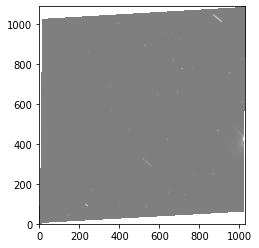

In [30]:
img.view()